In [1]:
from sklearn.model_selection import ParameterGrid
import numpy as np
import matplotlib.pyplot as plt
import torch as th
import torch.optim as optim

In [2]:
param_grid = {'lr': [0.1, 0.01], 'beta1': [0.0, 0.9],'beta2': [0.99, 0.999]}
n_learning_rates = len(param_grid['lr'])
param_list = list(ParameterGrid(param_grid))

In [3]:
def func(x):
    return (x-4)**2


Adam Configuration: {'beta1': 0.0, 'beta2': 0.99, 'lr': 0.1}


c:\Users\CarlosHerediaPimient\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch 0: x=1.100000023841858, loss=9.0
Epoch 20: x=2.7179653644561768, loss=1.808519721031189
Epoch 40: x=3.5888614654541016, loss=0.19267798960208893
Epoch 60: x=3.908986806869507, loss=0.00980788841843605
Epoch 80: x=3.986286163330078, loss=0.00023151555797085166
Epoch 100: x=3.998610019683838, loss=2.47684965870576e-06
Epoch 120: x=3.9999072551727295, loss=1.1510792319313623e-08

Adam Configuration: {'beta1': 0.0, 'beta2': 0.999, 'lr': 0.1}
Epoch 0: x=1.100000023841858, loss=9.0
Epoch 20: x=2.712462902069092, loss=1.821756362915039
Epoch 40: x=3.5717294216156006, loss=0.2077023983001709
Epoch 60: x=3.8937759399414062, loss=0.013143203221261501
Epoch 80: x=3.9798033237457275, loss=0.00048723971121944487
Epoch 100: x=3.996976375579834, loss=1.1173165148647968e-05
Epoch 120: x=3.99963641166687, loss=1.6505146049894392e-07

Adam Configuration: {'beta1': 0.9, 'beta2': 0.99, 'lr': 0.1}
Epoch 0: x=1.100000023841858, loss=9.0
Epoch 20: x=2.9697160720825195, loss=1.2360895872116089
Epoch 40:

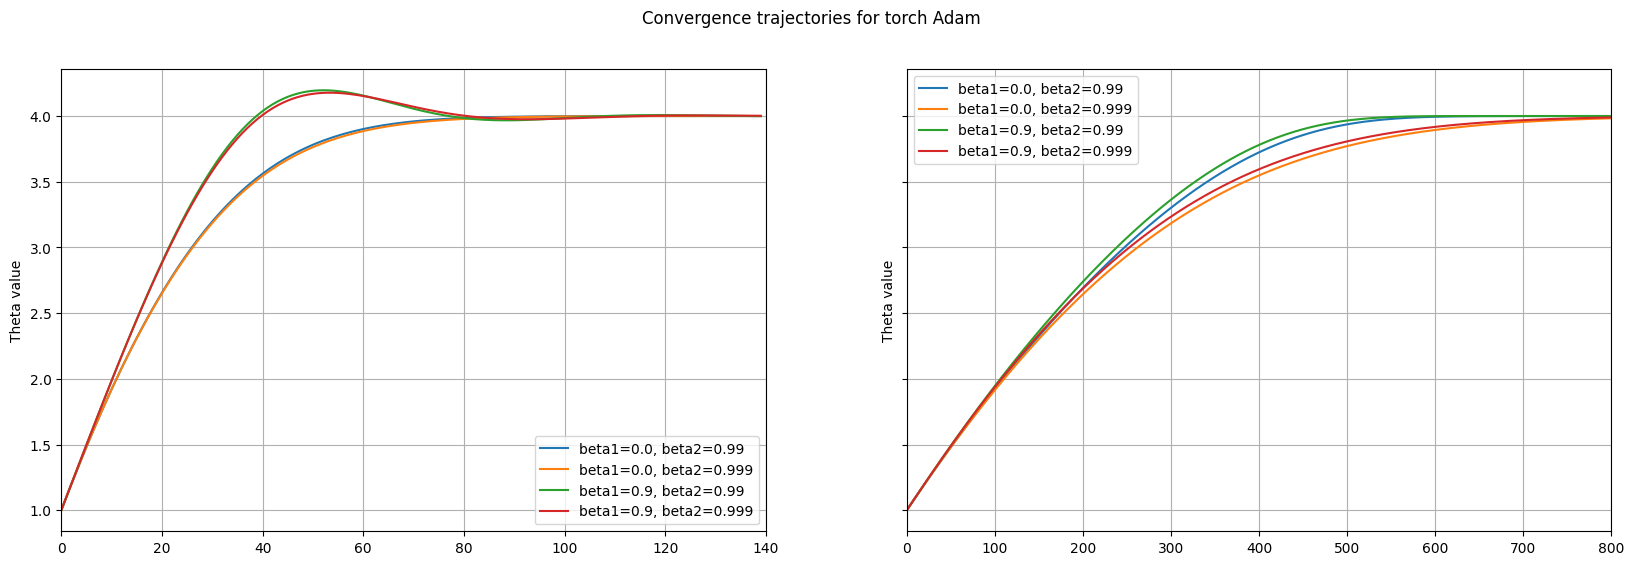

In [4]:
fig, axs = plt.subplots(ncols=n_learning_rates, figsize=(20, 6), sharex=False, sharey=True)   
fig.suptitle('Convergence trajectories for torch Adam')

for i, lr in enumerate(param_grid['lr']):

    ax = axs[i] if n_learning_rates > 1 else axs
    filtered_params = [p for p in param_list if p['lr'] == lr]

    if lr == 0.1:
        epochs = 140
    elif lr == 0.01:
        epochs = 800

    for params in filtered_params:

        print(f'\nAdam Configuration: {params}')

        theta = th.tensor([1.0], requires_grad=True)
        optimizer = optim.Adam([theta], lr=params['lr'], betas=(params['beta1'], params['beta2']))
        theta_values = []

        for epoch in range(epochs):
            theta_values.append(theta.item())
            optimizer.zero_grad()

            loss = func(theta)
            loss.backward()

            optimizer.step()

            if epoch % 20 == 0:
                print(f'Epoch {epoch}: x={theta.item()}, loss={loss.item()}')

        label = f"beta1={params['beta1']}, beta2={params['beta2']}"
        ax.plot(theta_values, label=label)
        ax.set_xlim([0, epochs])
        ax.grid(True)
        ax.set_ylabel('Theta value')
        ax.legend(loc = 'best')


RMSProp Configuration: {'beta': 0.0, 'lr': 0.1}
Epoch 0: x=1.100000023841858, loss=9.0
Epoch 20: x=3.099999189376831, loss=1.0000014305114746
Epoch 40: x=4.099692344665527, loss=9.37152435653843e-08
Epoch 60: x=4.099678039550781, loss=1.026783138513565e-07
Epoch 80: x=4.099663734436035, loss=1.1205065675312653e-07
Epoch 100: x=4.099649429321289, loss=1.2183227227069438e-07
Epoch 120: x=4.099635124206543, loss=1.3202316040406004e-07

RMSProp Configuration: {'beta': 0.9, 'lr': 0.1}
Epoch 0: x=1.3162277936935425, loss=9.0
Epoch 20: x=3.3252573013305664, loss=0.5369563698768616
Epoch 40: x=3.959678888320923, loss=0.002547569340094924
Epoch 60: x=3.9999966621398926, loss=5.820766091346741e-11
Epoch 80: x=4.0, loss=0.0
Epoch 100: x=4.0, loss=0.0
Epoch 120: x=4.0, loss=0.0

RMSProp Configuration: {'beta': 0.99, 'lr': 0.1}
Epoch 0: x=2.0, loss=9.0
Epoch 20: x=3.9942433834075928, loss=6.073006443330087e-05
Epoch 40: x=3.999990940093994, loss=1.6575540939811617e-10
Epoch 60: x=3.999999761581421

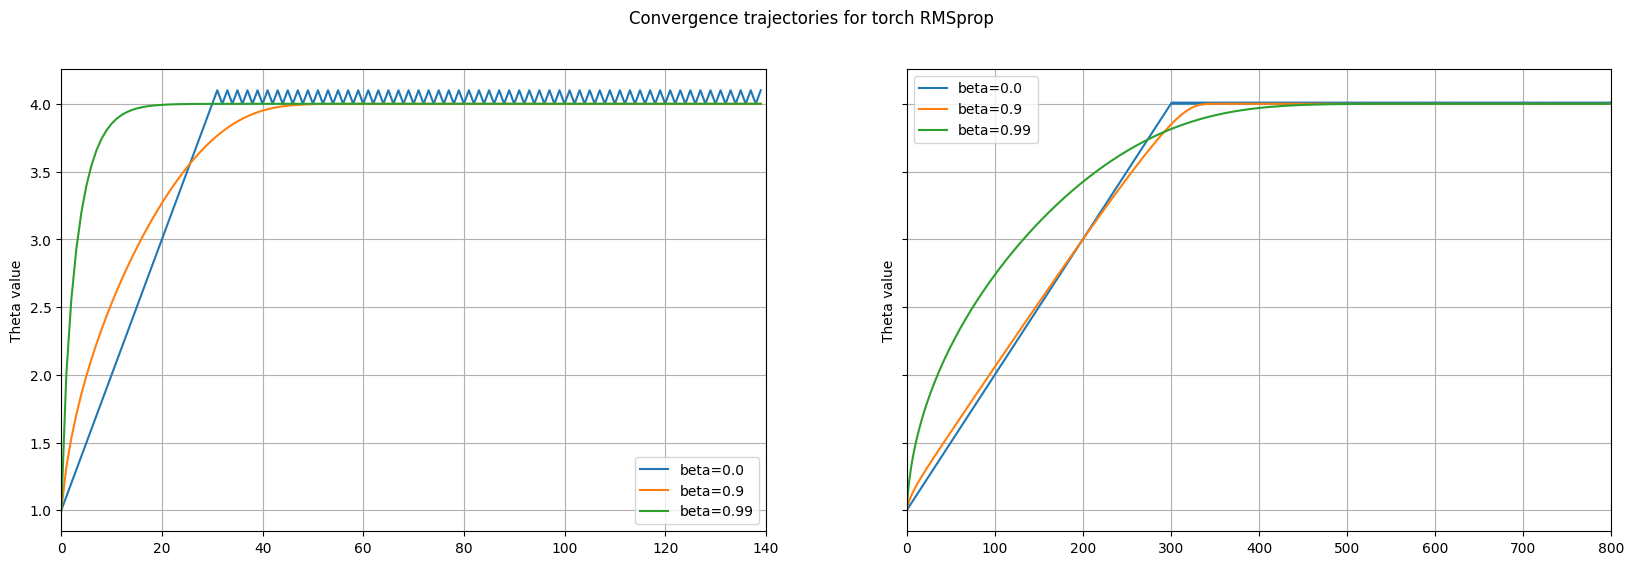

In [8]:
param_grid = {'lr': [0.1, 0.01], 'beta': [0.0, 0.9, 0.99]}
n_learning_rates = len(param_grid['lr'])
param_list = list(ParameterGrid(param_grid))

fig, axs = plt.subplots(ncols=n_learning_rates, figsize=(20, 6), sharex=False, sharey=True)   
fig.suptitle('Convergence trajectories for torch RMSprop')

for i, lr in enumerate(param_grid['lr']):

    ax = axs[i] if n_learning_rates > 1 else axs
    filtered_params = [p for p in param_list if p['lr'] == lr]

    if lr == 0.1:
        epochs = 140
    elif lr == 0.01:
        epochs = 800

    for params in filtered_params:

        print(f'\nRMSProp Configuration: {params}')

        theta = th.tensor([1.0], requires_grad=True)
        optimizer = optim.RMSprop([theta], lr=params['lr'], alpha=params['beta'])
        theta_values = []

        for epoch in range(epochs):
            theta_values.append(theta.item())
            optimizer.zero_grad()

            loss = func(theta)
            loss.backward()

            optimizer.step()

            if epoch % 20 == 0:
                print(f'Epoch {epoch}: x={theta.item()}, loss={loss.item()}')

        label = f"beta={params['beta']}"
        ax.plot(theta_values, label=label)
        ax.set_xlim([0, epochs])
        ax.grid(True)
        ax.set_ylabel('Theta value')
        ax.legend(loc = 'best')


RMSProp Configuration: {'lr': 0.1}
Epoch 0: x=1.100000023841858, loss=9.0
Epoch 20: x=1.7390320301055908, loss=5.200259208679199
Epoch 40: x=2.0503089427948, loss=3.8523499965667725
Epoch 60: x=2.2775774002075195, loss=3.001661539077759
Epoch 80: x=2.4596457481384277, loss=2.398365020751953
Epoch 100: x=2.6120941638946533, loss=1.945934534072876
Epoch 120: x=2.7430853843688965, loss=1.5952677726745605
Epoch 140: x=2.8575518131256104, loss=1.3175230026245117
Epoch 160: x=2.9587583541870117, loss=1.0941693782806396
Epoch 180: x=3.0490097999572754, loss=0.9125422239303589
Epoch 200: x=3.1300106048583984, loss=0.763598620891571
Epoch 220: x=3.203071355819702, loss=0.6406562328338623
Epoch 240: x=3.2692267894744873, loss=0.538654088973999
Epoch 260: x=3.3293166160583496, loss=0.4536761939525604
Epoch 280: x=3.3840322494506836, loss=0.382647842168808
Epoch 300: x=3.4339568614959717, loss=0.323116660118103
Epoch 320: x=3.4795849323272705, loss=0.2731121778488159
Epoch 340: x=3.52134442329406

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch 1820: x=3.9988651275634766, loss=1.2982377484149765e-06
Epoch 1840: x=3.9989538192749023, loss=1.1034919680241728e-06
Epoch 1860: x=3.9990360736846924, loss=9.36984179134015e-07
Epoch 1880: x=3.9991111755371094, loss=7.963790835674445e-07
Epoch 1900: x=3.999180555343628, loss=6.769710694243258e-07
Epoch 1920: x=3.9992446899414062, loss=5.751849698754086e-07
Epoch 1940: x=3.9993038177490234, loss=4.886614988208748e-07
Epoch 1960: x=3.9993581771850586, loss=4.1530989847160527e-07
Epoch 1980: x=3.999408483505249, loss=3.5271801834824146e-07

RMSProp Configuration: {'lr': 0.01}
Epoch 0: x=1.0099999904632568, loss=9.0
Epoch 20: x=1.077738881111145, loss=8.55224323272705
Epoch 40: x=1.1134034395217896, loss=8.341330528259277
Epoch 60: x=1.1409597396850586, loss=8.181305885314941
Epoch 80: x=1.1642202138900757, loss=8.047821998596191
Epoch 100: x=1.1847071647644043, loss=7.931349277496338
Epoch 120: x=1.203211784362793, loss=7.826983451843262
Epoch 140: x=1.2202082872390747, loss=7.7317

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch 199880: x=3.9972925186157227, loss=7.3304554462083615e-06
Epoch 199900: x=3.9972925186157227, loss=7.3304554462083615e-06
Epoch 199920: x=3.9972925186157227, loss=7.3304554462083615e-06
Epoch 199940: x=3.9972925186157227, loss=7.3304554462083615e-06
Epoch 199960: x=3.9972925186157227, loss=7.3304554462083615e-06
Epoch 199980: x=3.9972925186157227, loss=7.3304554462083615e-06


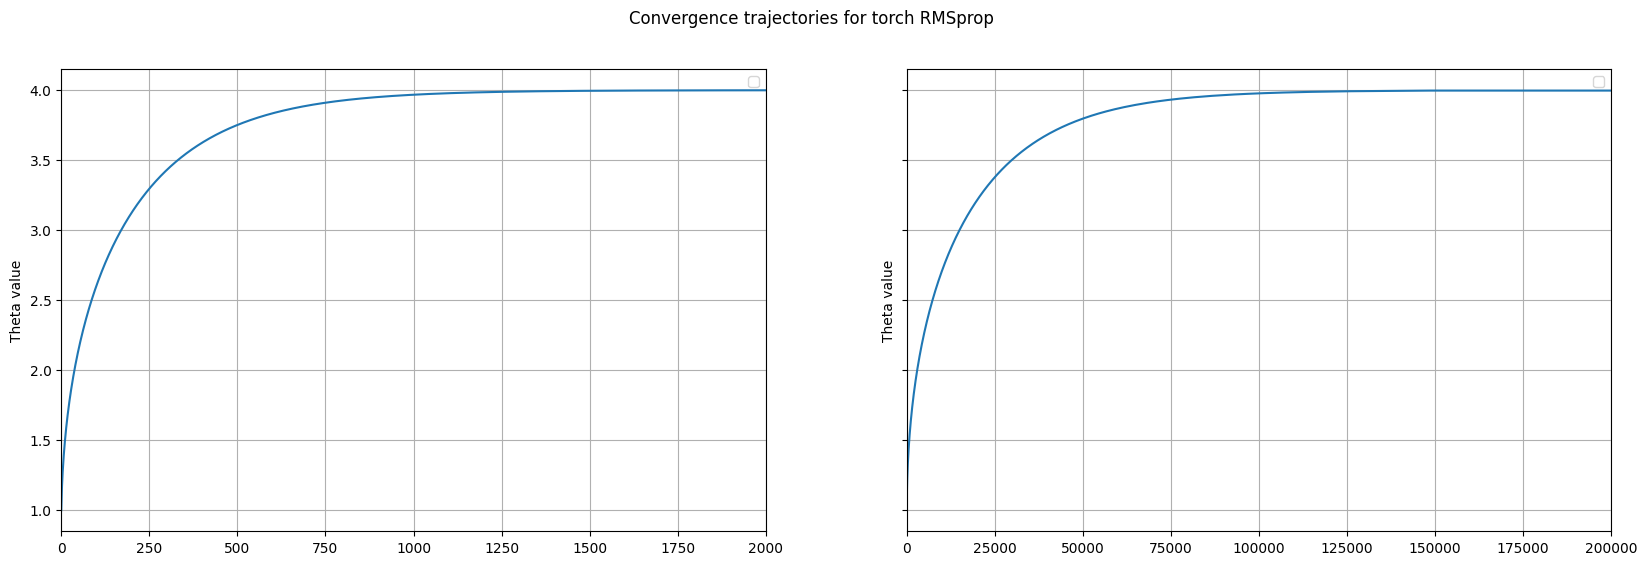

In [10]:
param_grid = {'lr': [0.1, 0.01]}
n_learning_rates = len(param_grid['lr'])
param_list = list(ParameterGrid(param_grid))

fig, axs = plt.subplots(ncols=n_learning_rates, figsize=(20, 6), sharex=False, sharey=True)   
fig.suptitle('Convergence trajectories for torch RMSprop')

for i, lr in enumerate(param_grid['lr']):

    ax = axs[i] if n_learning_rates > 1 else axs
    filtered_params = [p for p in param_list if p['lr'] == lr]

    if lr == 0.1:
        epochs = int(2e3)
    elif lr == 0.01:
        epochs = int(2e5)

    for params in filtered_params:

        print(f'\nRMSProp Configuration: {params}')

        theta = th.tensor([1.0], requires_grad=True)
        optimizer = optim.Adagrad([theta], lr=params['lr'])
        theta_values = []

        for epoch in range(epochs):
            theta_values.append(theta.item())
            optimizer.zero_grad()

            loss = func(theta)
            loss.backward()

            optimizer.step()

            if epoch % 20 == 0:
                print(f'Epoch {epoch}: x={theta.item()}, loss={loss.item()}')

        ax.plot(theta_values)
        ax.set_xlim([0, epochs])
        ax.grid(True)
        ax.set_ylabel('Theta value')
        ax.legend(loc = 'best')